In [1]:
from fastai import data_block
from fastai import datasets
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
DATA_PATH = '/home/jupyter/datascience/chest-xray-pneumonia/data/chest_xray'

In [3]:
tfms=get_transforms()
data=ImageDataBunch.from_folder(path=DATA_PATH
                                ,valid='val'
                                ,valid_pct=0.2 #valid data too less use percent .. may be in this case valid folder not needed
                               ,size=224,ds_tfms=tfms,bs=64).normalize(imagenet_stats)

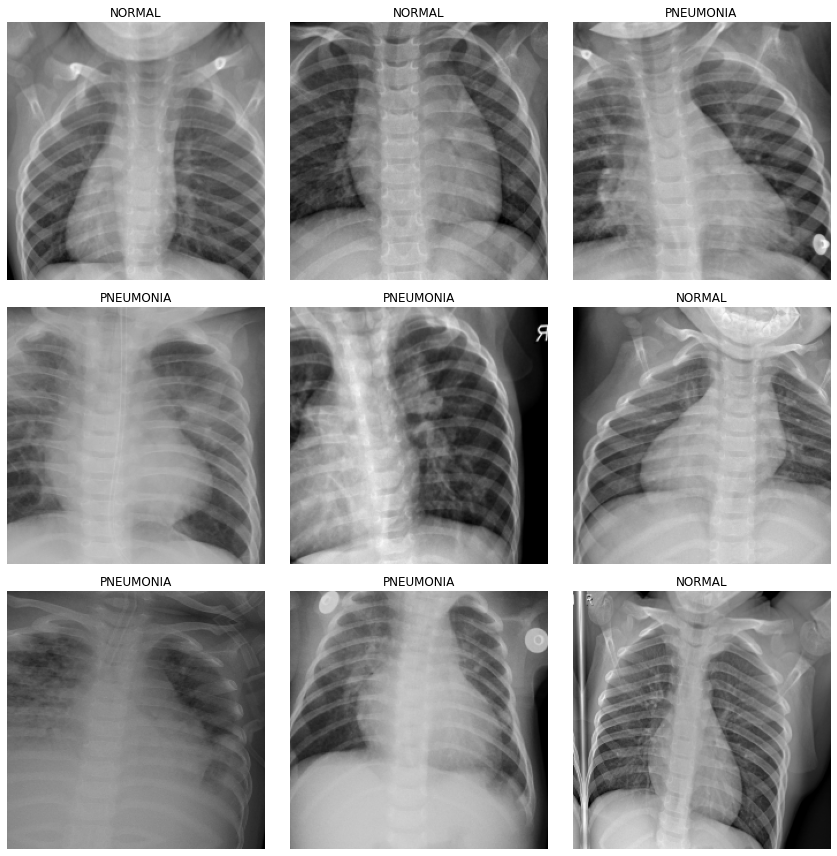

In [4]:
data.show_batch(rows=3)

In [5]:
learner=cnn_learner(data=data,base_arch=models.resnet34,metrics=error_rate)

In [6]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.372023,0.287237,0.083689,01:52
1,0.217274,0.186846,0.062767,01:58
2,0.175212,0.133408,0.040991,01:57
3,0.132877,0.129540,0.040991,01:59


In [7]:
learner.save('chest-stage-1')

In [8]:
interp = ClassificationInterpretation.from_learner(learner)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

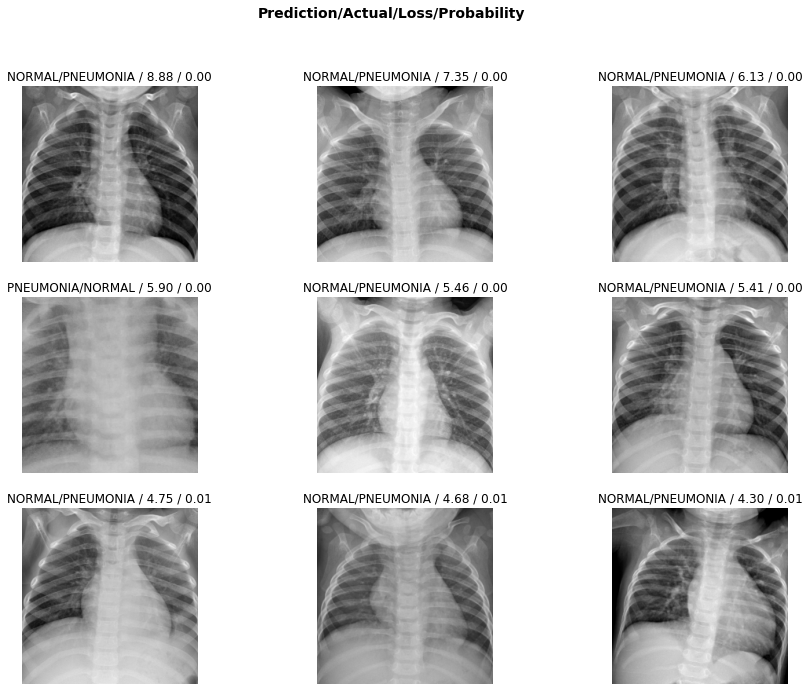

In [9]:
interp.plot_top_losses(9, figsize=(15,11))

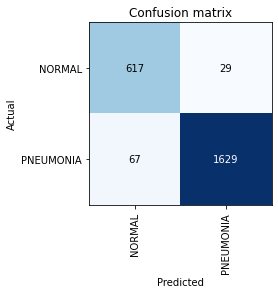

In [10]:
interp.plot_confusion_matrix()

In [11]:
learner.unfreeze()

In [12]:
learner.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.152440,0.350476,0.102904,01:57
1,0.085949,0.063172,0.022630,01:59


In [13]:
learner.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


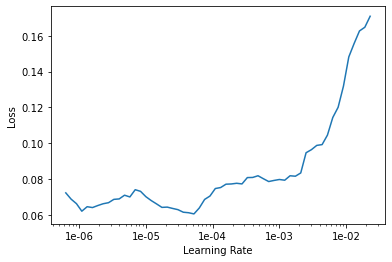

In [14]:
learner.recorder.plot()

In [15]:
learner.fit_one_cycle(4,max_lr=slice(3e-06,3e-05))

epoch,train_loss,valid_loss,error_rate,time
0,0.065208,0.056734,0.019641,01:58
1,0.066002,0.055078,0.017506,01:57
2,0.063807,0.069448,0.025192,01:56
3,0.062041,0.060286,0.022630,01:56


In [60]:
learner.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

[<function fastai.metrics.error_rate(input: torch.Tensor, targs: torch.Tensor) -> <function NewType.<locals>.new_type at 0x7f1ae523d8c0>>]